# Decision trees and Random forest 

In [1]:
import pandas as pd
import numpy as np
import graphviz 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import matplotlib.pyplot as plt

- In this class we are going to start with some trees aplications to a price car prediction. The data we are going to use is availble [here](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)

In [59]:
audi=pd.read_csv('audi.csv')
bmw=pd.read_csv('bmw.csv')
ford=pd.read_csv('ford.csv')
skoda=pd.read_csv('skoda.csv')
toyota=pd.read_csv('toyota.csv')

In [60]:
bmw=pd.read_csv('bmw.csv')
ford=pd.read_csv('ford.csv')
skoda=pd.read_csv('skoda.csv')
toyota=pd.read_csv('toyota.csv')

In [61]:
ford=pd.read_csv('ford.csv')
skoda=pd.read_csv('skoda.csv')
toyota=pd.read_csv('toyota.csv')

- We can see that all the data set´s have the same variables. Let´s create a variable that identifies the brand of the car and append them. 

In [63]:
bmw['brand']='bmw'
audi['brand']='audi'
ford['brand']='ford'
skoda['brand']='skoda'
toyota['brand']='toyota'

In [64]:
data=pd.concat([ford,toyota,audi,bmw,skoda])

In [65]:
data=data.reset_index(drop=True)

In [66]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0,ford
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0,ford
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0,ford
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5,ford
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0,ford
...,...,...,...,...,...,...,...,...,...,...
52414,Yeti,2014,11440,Semi-Auto,14569,Petrol,160,44.8,1.2,skoda
52415,Octavia,2014,10990,Semi-Auto,49999,Petrol,30,56.5,1.4,skoda
52416,Fabia,2017,9500,Semi-Auto,17131,Petrol,145,61.4,1.0,skoda
52417,Citigo,2016,5999,Manual,21747,Petrol,20,62.8,1.0,skoda


## **Data preprocessing**

In [67]:
data.isnull().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
dtype: int64

In [68]:
data['year']=data['year'].astype(str)
data['year']

0        2017
1        2018
2        2017
3        2019
4        2019
         ... 
52414    2014
52415    2014
52416    2017
52417    2016
52418    2017
Name: year, Length: 52419, dtype: object

In [69]:
dummies= pd.get_dummies(data[['model', 'year','transmission','fuelType','brand']])

In [70]:
data=data.drop(columns=['model', 'year','transmission','fuelType','brand'])

In [71]:
data = pd.concat([data, dummies], axis=1)

In [72]:
data

,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,brand_audi,brand_bmw,brand_ford,brand_skoda,brand_toyota
0,12000,15944,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,14000,9083,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,13000,12456,150,57.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,17500,10460,145,40.3,1.5,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,16500,1482,145,48.7,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52414,11440,14569,160,44.8,1.2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
52415,10990,49999,30,56.5,1.4,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
52416,9500,17131,145,61.4,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
52417,5999,21747,20,62.8,1.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


## **Regression tree**

- Is it important that our trainig and testing data sets are defined randomly?

- Not randomly defined train and test set

In [73]:
data.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       'model_ 5 Series',
       ...
       'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'brand_audi', 'brand_bmw',
       'brand_ford', 'brand_skoda', 'brand_toyota'],
      dtype='object', length=148)

In [74]:
data_train=data[(data['brand_audi']==1)|(data['brand_bmw']==1)|(data['brand_toyota']==1)]
data_test=data[(data['brand_ford']==1)|(data['brand_skoda']==1)]

In [75]:
tree1=DecisionTreeRegressor(max_depth=7).fit(data_train.drop(columns=['price']), data_train['price'])

In [76]:
mse(data_test['price'], tree1.predict(data_test.drop(columns=['price'])))

36435360.40261215

- Randomly defined train and test set

In [77]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['price']),data['price'], test_size=0.30,
                                                    random_state=200,
                                                    shuffle=True)

In [78]:
tree2=DecisionTreeRegressor(max_depth=7).fit(x_train,y_train)

In [80]:
mse(y_test, tree2.predict(x_test))

13579225.286210679

- Know, we want to define the max_depht parameter that minimizes the out of sample using cross validation. 

In [81]:
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30)},
                  cv=10,
                  n_jobs=10,
                  scoring='neg_mean_squared_error')
cv_tree1=gs.fit(x_train, y_train)

In [82]:
gs.best_estimator_

DecisionTreeRegressor(max_depth=19)

In [83]:
mse(y_test, cv_tree1.predict(x_test))

6493506.23272502

- **Ploting tree**

In [25]:
from sklearn import tree

In [26]:
model=DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)

In [84]:
data.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       'model_ 5 Series',
       ...
       'fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid',
       'fuelType_Other', 'fuelType_Petrol', 'brand_audi', 'brand_bmw',
       'brand_ford', 'brand_skoda', 'brand_toyota'],
      dtype='object', length=148)

[Text(465.0, 792.75, 'tax <= 41.2\nmse = 96300072.127\nsamples = 36693\nvalue = 16851.007'),
 Text(232.5, 566.25, 'mpg <= 2.65\nmse = 211613516.593\nsamples = 4586\nvalue = 30849.681'),
 Text(116.25, 339.75, 'mileage <= 155.0\nmse = 73704344.41\nsamples = 2987\nvalue = 25443.663'),
 Text(58.125, 113.25, 'mse = 46899298.193\nsamples = 2529\nvalue = 27517.563'),
 Text(174.375, 113.25, 'mse = 66825318.99\nsamples = 458\nvalue = 13991.926'),
 Text(348.75, 339.75, 'price <= 15596.0\nmse = 312656909.887\nsamples = 1599\nvalue = 40948.354'),
 Text(290.625, 113.25, 'mse = 212745224.642\nsamples = 1000\nvalue = 49246.71'),
 Text(406.875, 113.25, 'mse = 172567059.877\nsamples = 599\nvalue = 27094.671'),
 Text(697.5, 566.25, 'transmission_Automatic <= 0.5\nmse = 47840953.537\nsamples = 32107\nvalue = 14851.508'),
 Text(581.25, 339.75, 'price <= 9933.5\nmse = 57311336.777\nsamples = 12109\nvalue = 19563.51'),
 Text(523.125, 113.25, 'mse = 61112412.781\nsamples = 3932\nvalue = 24943.858'),
 Text(63

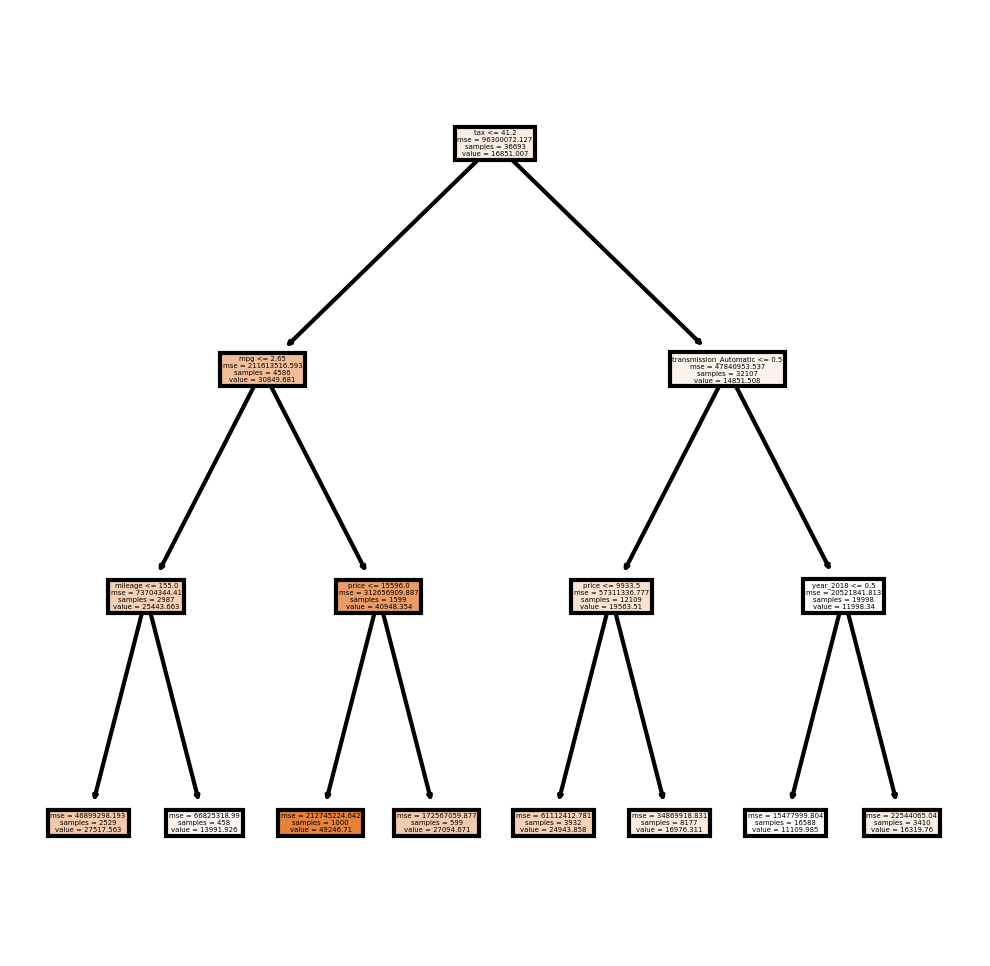

In [27]:
fn=data.columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               filled = True)

In [62]:
fig.savefig('regression_tree.png')

## **Random Forest**

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
rf = RandomForestRegressor(random_state = 42).fit(x_train,y_train)

In [30]:
mse(y_test, rf.predict(x_test))

4022670.789853192

The random forest model has a lot of parameter we can optimize to get a better fit in our model.
- n_estimators = number of trees in the foreset
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node

In [31]:
n_estimators =  [50,100,150]
max_depth = [10,20,30,40]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

In [32]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = 10, verbose = 2)


rf_cv=grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=10)]: Done 142 tasks      | elapsed:  6.3min
[Parallel(n_jobs=10)]: Done 345 tasks      | elapsed: 17.0min
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed: 27.1min finished


In [85]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=10, n_estimators=50)

- Even if with the random forest model we loss a lot of the model interpretation that a simple decision tree gave us, we can still get the importance of each feauture 

In [34]:
importances1 =rf_cv.best_estimator_.feature_importances_

In [35]:
importances1

array([1.46869157e-01, 5.28317441e-02, 3.25025646e-01, 1.81253673e-01,
       4.25230231e-03, 2.05464253e-03, 1.02571130e-03, 6.22499130e-04,
       1.31988281e-03, 2.94215856e-04, 1.82412078e-03, 1.09961762e-03,
       1.13846072e-03, 0.00000000e+00, 4.31132368e-04, 4.98729316e-04,
       4.00833220e-04, 7.04759691e-04, 1.92043590e-04, 6.27055355e-04,
       7.59991796e-04, 5.40394041e-05, 1.93824547e-03, 7.16352402e-05,
       1.01112330e-03, 2.14416750e-04, 2.36603701e-06, 7.37936961e-04,
       4.52809377e-05, 2.51023644e-04, 2.69818177e-04, 0.00000000e+00,
       1.25600818e-03, 8.09603134e-04, 1.67090174e-03, 1.43382980e-05,
       3.79228537e-05, 1.31524602e-04, 6.45750791e-05, 2.61318697e-05,
       5.76627835e-05, 1.52223052e-06, 2.49930310e-04, 9.90190408e-04,
       2.71515869e-05, 1.06080192e-03, 1.12691382e-03, 1.88906129e-03,
       2.87905182e-04, 3.10829474e-05, 1.34634931e-04, 6.43018332e-04,
       2.62972841e-04, 6.88790126e-06, 2.76947959e-04, 1.01833782e-03,
      

In [86]:
importances_df1=pd.DataFrame({'importances':importances1,'feauture':data.drop(columns=['price']).columns})

In [89]:
importances_df1=importances_df1.sort_values(by=['importances'],ascending=False)

In [90]:
importances_df1

,importances,feauture
2,0.325026,mpg
3,0.181254,engineSize
0,0.146869,mileage
134,0.129045,transmission_Manual
1,0.052832,tax
...,...,...
83,0.000000,model_ Streetka
72,0.000000,model_ Ranger
108,0.000000,year_1997
13,0.000000,model_ A2


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

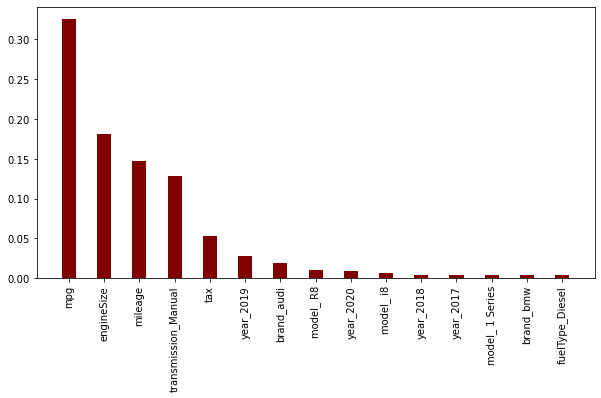

In [91]:
fig = plt.figure(figsize = (10, 5))
plt.bar(importances_df1.feauture[:15],importances_df1.importances[:15], color ='maroon',
        width = 0.4)
plt.xticks( rotation='vertical')

## **Classification problem**


- To see how we can apply decision trees to a classification problem we are going use the following [data](https://www.kaggle.com/uciml/pima-indians-diabetes-database), to build models which objective is to predict if a person is diabetic.

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
data2=pd.read_csv('diabetes.csv')

In [100]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [42]:
x1_train, x1_test, y1_train, y1_test = train_test_split(data2.drop(columns=['Outcome']),data2['Outcome'], test_size=0.10,
                                                    random_state=200,
                                                    shuffle=True)

In [101]:
data2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [102]:
clf1=DecisionTreeClassifier(max_depth=3).fit(x1_train,y1_train)

In [103]:
y_pred=clf1.predict(x1_test)

In [105]:
accuracy_score(y1_test, y_pred)

0.7792207792207793

- Optimize max_depth in classification problem

In [106]:
model = DecisionTreeClassifier()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 30)},
                  cv=10,
                  n_jobs=10,
                  scoring='accuracy')

clf2=gs.fit(x1_train, y1_train)

In [107]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [108]:
y_pred1=clf2.predict(x1_test)

In [109]:
accuracy_score(y1_test, y_pred1)

0.7402597402597403

**Random forest for classification problems**

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_clf=RandomForestClassifier().fit(x1_train,y1_train)

In [111]:
y_pred2=rf_clf.predict(x1_test)

In [112]:
accuracy_score(y1_test, y_pred2)

0.8181818181818182

In [113]:
rfcl = RandomForestClassifier()
n_estimators =  [50,100,150]
max_depth = [10,20,30,40]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, 
                          cv = 5, n_jobs = 10, verbose = 2)
rfcl_cv=grid_search.fit(x1_train, y1_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  22 tasks      | elapsed:    0.8s
[Parallel(n_jobs=10)]: Done 264 tasks      | elapsed:    7.5s
[Parallel(n_jobs=10)]: Done 540 out of 540 | elapsed:   15.4s finished


In [114]:
y_pred3=rfcl_cv.predict(x1_test)

In [115]:
accuracy_score(y1_test, y_pred3)

0.8181818181818182

In [116]:
importances =rfcl_cv.best_estimator_.feature_importances_

In [117]:
importances_df=pd.DataFrame({'importances':importances,'feauture':data2.drop(columns=['Outcome']).columns})

In [118]:
importances_df

,importances,feauture
0,0.079684,Pregnancies
1,0.240129,Glucose
2,0.093205,BloodPressure
3,0.066722,SkinThickness
4,0.068128,Insulin
5,0.182514,BMI
6,0.127781,DiabetesPedigreeFunction
7,0.141837,Age


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text major ticklabel objects>)

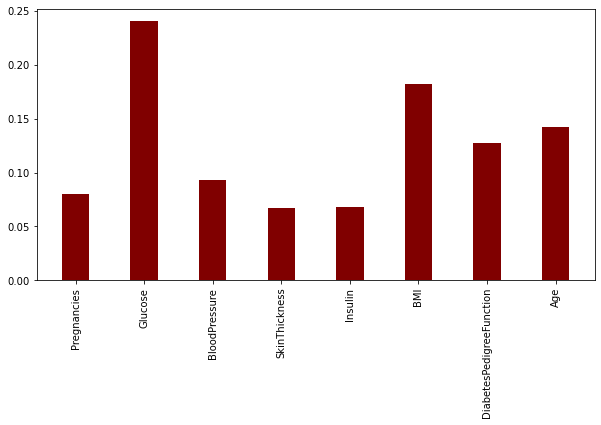

In [119]:
fig = plt.figure(figsize = (10, 5))
plt.bar(importances_df.feauture,importances_df.importances, color ='maroon',
        width = 0.4)
plt.xticks( rotation='vertical')